In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("student_data.csv")

In [6]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
# Selecting relevant features
features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 
            'G1', 'G2']

In [8]:
target = 'G3'

In [9]:
# Extracting features and target variable
X = data[features]
y = data[target]

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Building and training the linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Analyzing model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': linear_reg_model.coef_})
print(coefficients)

       Feature  Coefficient
0          age    -0.198011
1         Medu     0.094194
2         Fedu    -0.188338
3   traveltime     0.131009
4    studytime    -0.066050
5     failures    -0.416258
6       famrel     0.334612
7     freetime     0.010623
8        goout     0.137633
9         Dalc    -0.105011
10        Walc     0.061756
11      health     0.059078
12    absences     0.044864
13          G1     0.160748
14          G2     0.977534


In [13]:
# Evaluating model performance
y_pred = linear_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4.503769153719584
R-squared: 0.7803580213768331


In [17]:
# # Plotting the predicted vs. actual scores
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Final Exam Score (G3)')
# plt.ylabel('Predicted Final Exam Score (G3)')
# plt.title('Actual vs. Predicted Final Exam Score')
# plt.show()

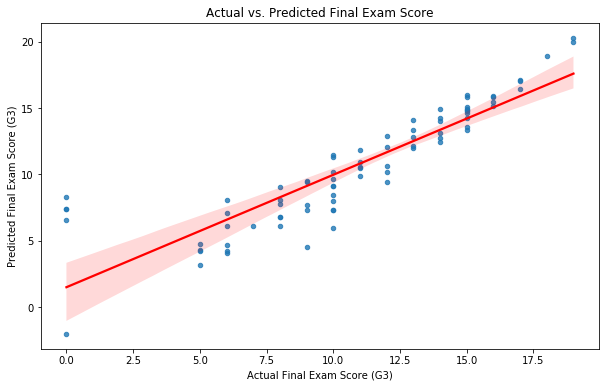

In [16]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel('Actual Final Exam Score (G3)')
plt.ylabel('Predicted Final Exam Score (G3)')
plt.title('Actual vs. Predicted Final Exam Score')

plt.show()